In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from skimage.io import imread
import cv2
from skimage.transform import resize
from sklearn.model_selection import StratifiedKFold

#from keras.preprocessing.image import ImageDataGenerator
#import keras
#import keras.backend as K

In [2]:
df=pd.read_csv('./Data/train.csv', index_col=0)
df.head()

Target
Id                                           
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [3]:
df.index

Index(['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0',
       '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
       '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0',
       '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0',
       '001838f8-bbca-11e8-b2bc-ac1f6b6435d0',
       '001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0',
       '0020af02-bbba-11e8-b2ba-ac1f6b6435d0',
       '002679c2-bbb6-11e8-b2ba-ac1f6b6435d0',
       '00285ce4-bba0-11e8-b2b9-ac1f6b6435d0',
       '002daad6-bbc9-11e8-b2bc-ac1f6b6435d0',
       ...
       'ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0',
       'ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0',
       'ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0',
       'ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0',
       'ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0',
       'ffed4430-bbac-11e8-b2ba-ac1f6b6435d0',
       'fff0a998-bbae-11e8-b2ba-ac1f6b6435d0',
       'fff189d8-bbab-11e8-b2ba-ac1f6b6435d0',
       'fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0',
       'fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0'],
      dtype='object', name='Id', length=31072)

In [4]:
images=[imread('./Data/train/'+x+'_green.png', as_gray=True) for x in df.index]
print(images[0].shape)
df['Image']=images

(512, 512)


In [5]:
thresholded=df.iloc[:20, 1].apply(lambda x: cv2.thr)

AttributeError: module 'cv2.cv2' has no attribute 'thr'

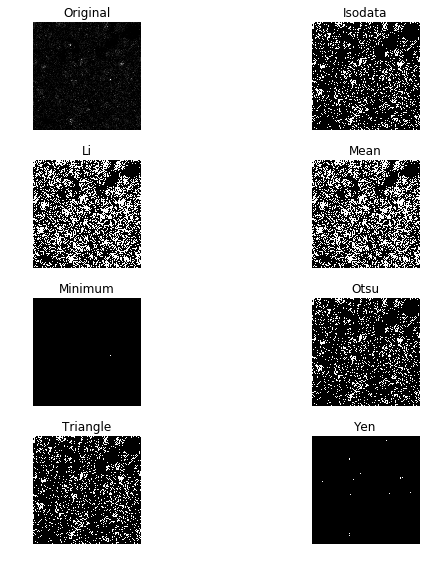

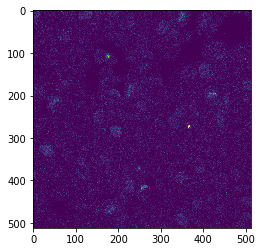

In [6]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(df.iloc[0, 1], figsize=(10, 8), verbose=False)
plt.show()
plt.imshow(df.iloc[0, 1])
plt.show()

Example Images


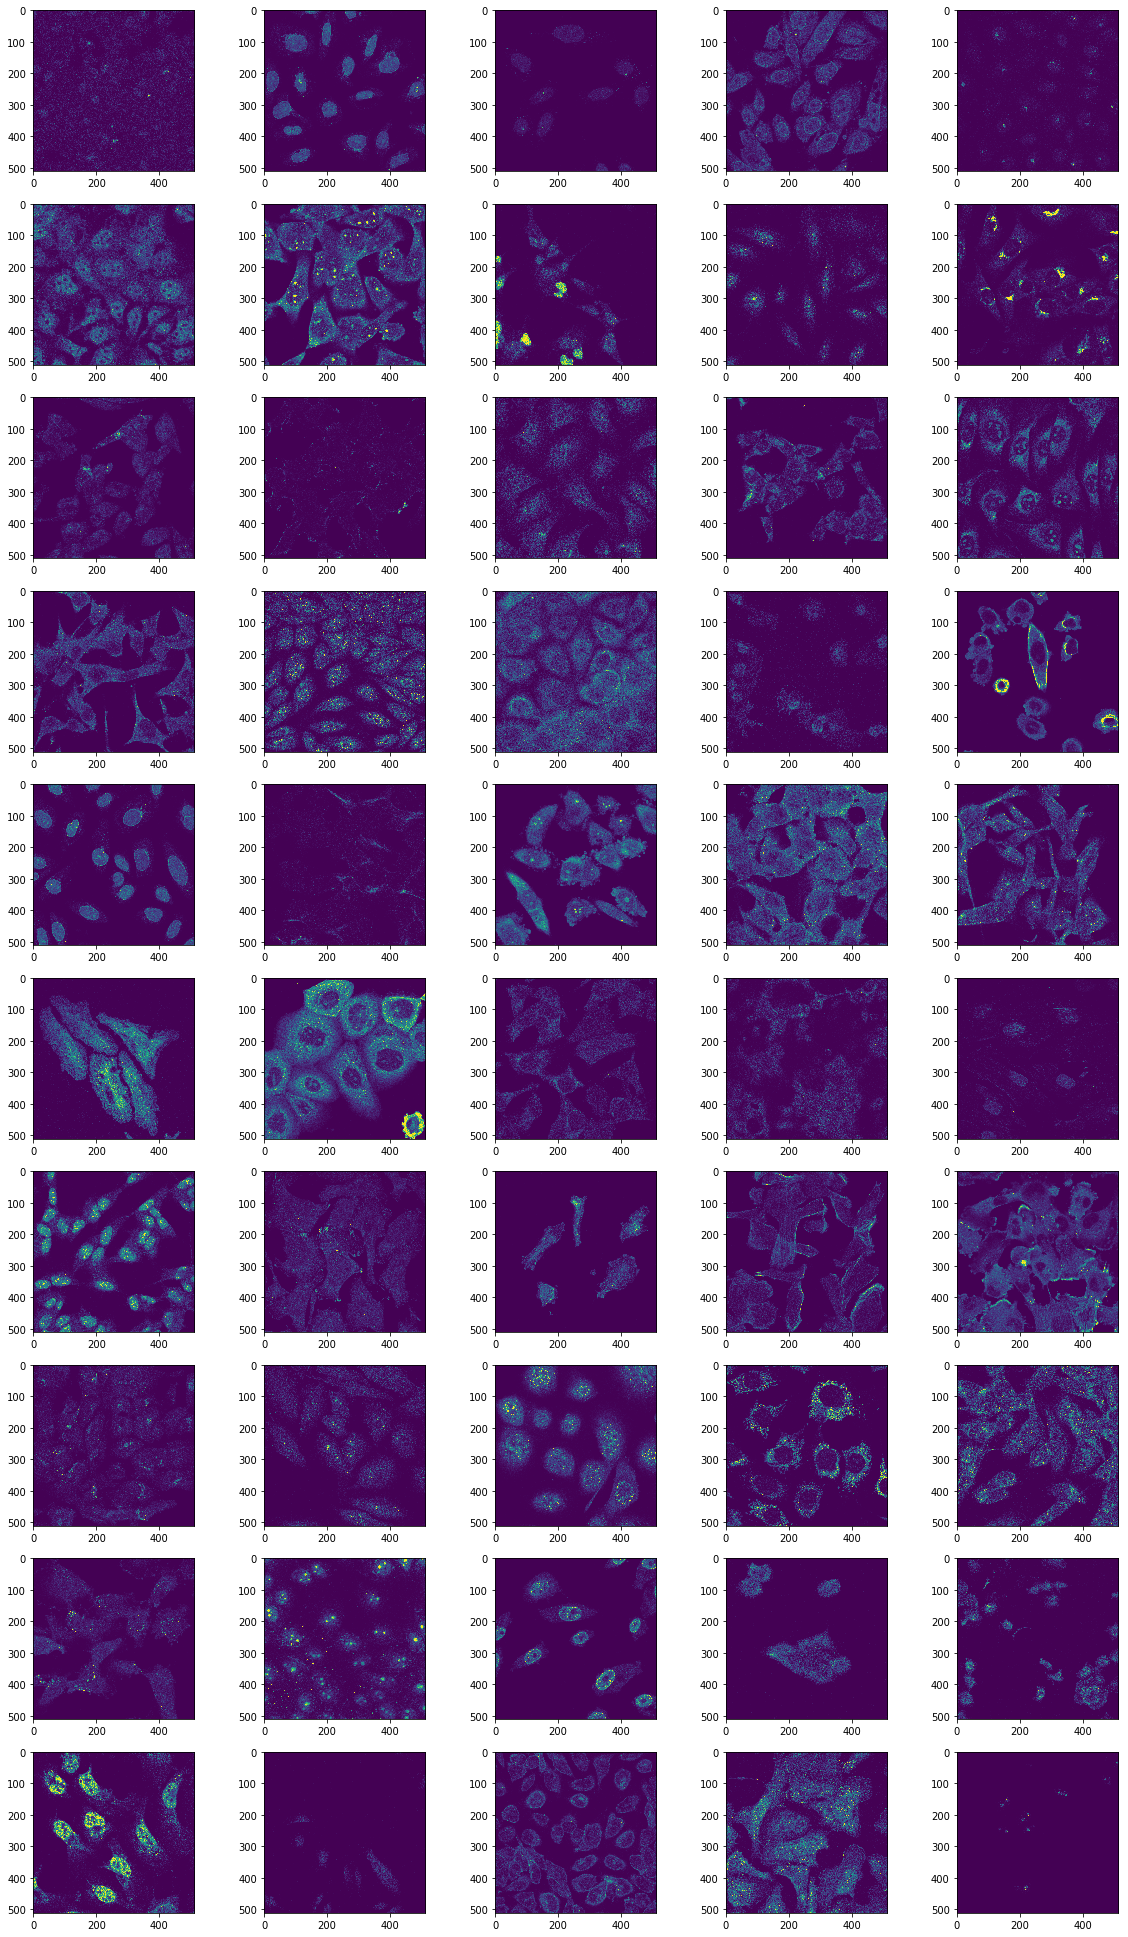

In [7]:
shape=[10, 5]
fig=plt.figure(figsize=(20, 35))
for i in range(shape[0]*shape[1]):
    sub=plt.subplot(shape[0], shape[1], i+1)
    plt.imshow(df.iloc[i, 1])
print('Example Images')
plt.show()

In [8]:
df['Hist']=df['Image'].apply(lambda x: np.histogram(x, 128)[0])
df.head()

Target  \
Id                                              
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18   

                                                                                  Image  \
Id                                                                                        
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...   
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...   
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                                                   Hist  
Id                                                                                       
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0  [109322, 23251, 20210, 17353, 15039, 12604, 10...  
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [176534, 16493, 9999, 6657, 4649, 3324, 2312, ...  
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0  [231419, 4799, 3146, 2962, 3087, 2945, 2800, 2...  
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0  [107377, 11906, 8641, 7448, 7305, 7379, 7356, ...  
001838f8-bbca-11e8-b2bc-ac1f6b6435d0  [174819, 33119, 18475, 11102, 7161, 4571, 3142...

Example Images


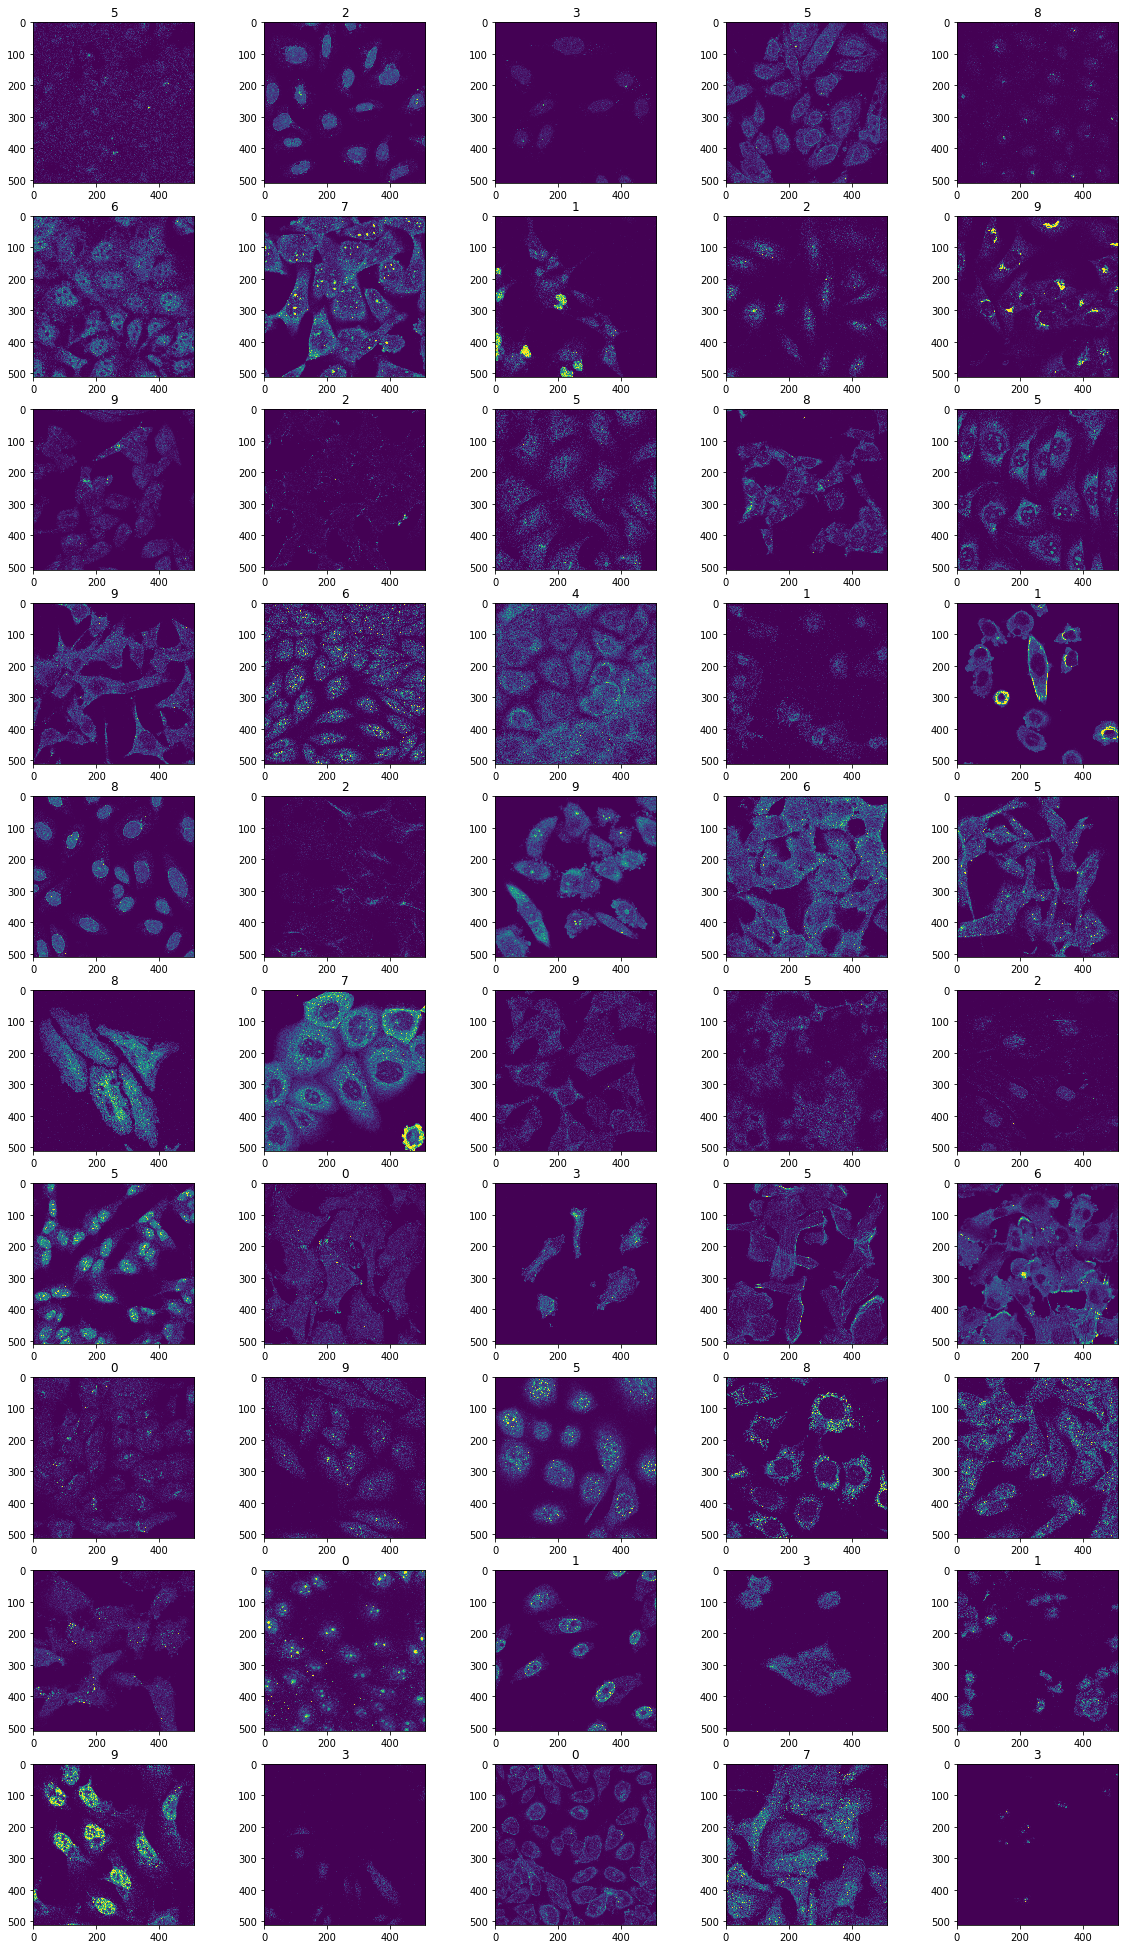

In [9]:
from sklearn.cluster import KMeans
clusters=10
kmeans=KMeans(clusters)
df['Cluster']=kmeans.fit_predict([np.array(x) for x in df['Hist'].values])
df.head()
shape=[10, 5]
fig=plt.figure(figsize=(20, 35))
for i in range(shape[0]*shape[1]):
    sub=plt.subplot(shape[0], shape[1], i+1)
    sub.set_title(df.iloc[i, 3])
    plt.imshow(df.iloc[i, 1])
print('Example Images')
plt.show()

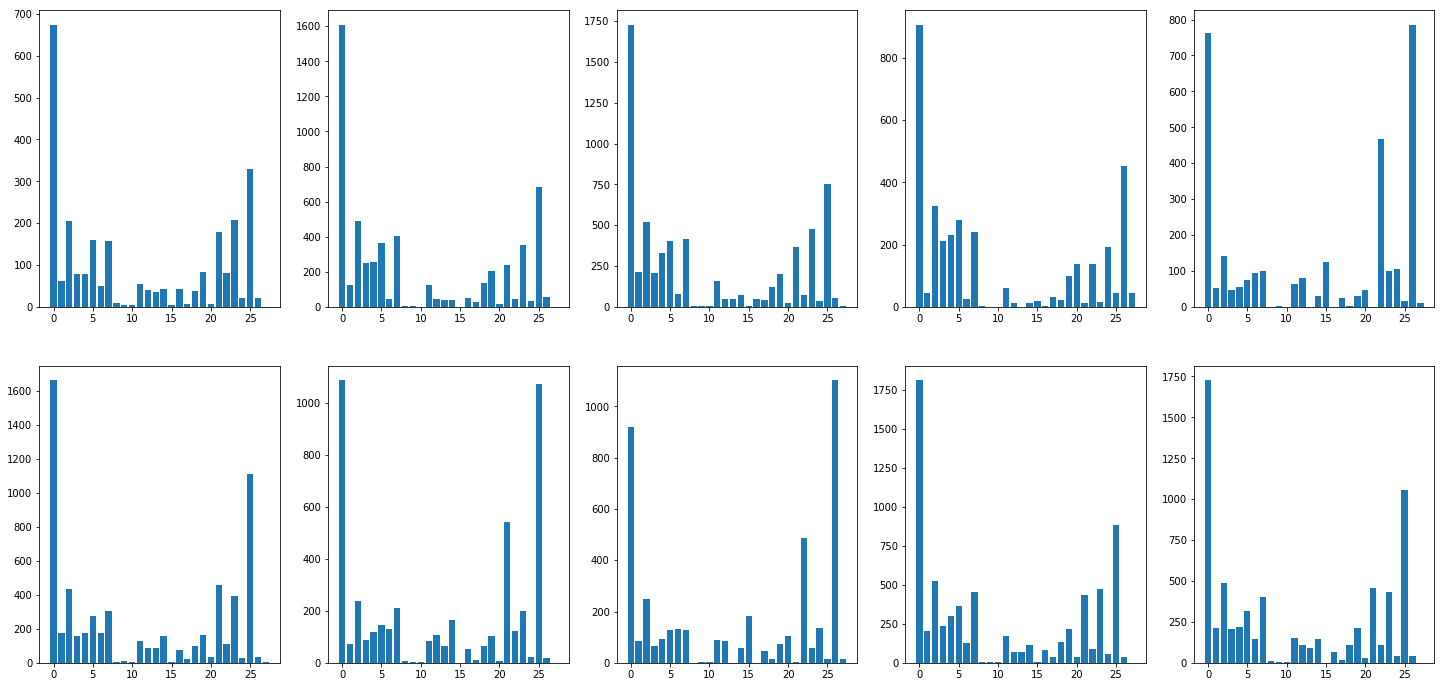

In [10]:
plt.figure(figsize=(25, 12))
df['Classes']=df['Target'].apply(lambda x: np.array([int(t) for t in x.split(' ')]))
for i in range(clusters):
    cluster=df.loc[df['Cluster']==i]
    classes=cluster['Classes']
    al=[]
    for k in classes:
        al.extend(list(k))
    al=np.array(al)
    hist=np.histogram(al, 28)
    sub=plt.subplot(2, 5, i+1)
    plt.bar(range(28), hist[0])
plt.show()